In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf


In [2]:
""" 공부만 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_studying = pd.read_csv("keypoint_studying.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_studying

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.425881,0.566605,0.391640,0.587256,0.398511,0.545403,0.329299,0.667827,0.356962,0.572735,0.397179,0.767028,0.424201,0.571095,0.676894,0.637928,0.557019,0.463024,0.617440,0.564058,0.000000,0.000000
1,0.198871,0.781391,0.154452,0.787421,0.133364,0.745978,0.134638,0.694983,0.105760,0.589361,0.478517,0.692546,0.346544,0.389911,0.773012,0.801967,0.775933,0.541181,0.000000,0.000000,0.000000,0.000000
2,0.365314,0.282141,0.271829,0.347142,0.307445,0.217398,0.209194,0.475457,0.294244,0.176804,0.447492,0.717408,0.490165,0.108954,0.716864,0.963684,0.000000,0.000000,0.777386,0.678424,0.000000,0.000000
3,0.362679,0.482227,0.312292,0.500384,0.302197,0.464266,0.252697,0.403829,0.145771,0.323288,0.000000,0.000000,0.348355,0.051928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.445296,0.456081,0.404463,0.480793,0.410008,0.421912,0.388959,0.487989,0.392060,0.351653,0.486426,0.555277,0.494340,0.255154,0.708960,0.604972,0.711060,0.181837,0.753891,0.491624,0.767122,0.244914
5,0.327364,0.481281,0.238715,0.527545,0.268335,0.470286,0.217427,0.630219,0.000000,0.000000,0.505692,0.785721,0.514427,0.519383,0.842631,0.768910,0.853632,0.469487,0.000000,0.000000,0.690754,0.320697
6,0.304696,0.483787,0.205657,0.530345,0.253770,0.473878,0.192040,0.626068,0.000000,0.000000,0.500904,0.782839,0.509893,0.514300,0.000000,0.000000,0.860866,0.453928,0.570485,0.504075,0.682248,0.326924
7,0.415307,0.362290,0.387698,0.376241,0.379701,0.351818,0.000000,0.000000,0.346088,0.280969,0.000000,0.000000,0.362183,0.164282,0.587584,0.462048,0.000000,0.000000,0.412246,0.491493,0.000000,0.000000
8,0.241377,0.555312,0.193170,0.586362,0.162437,0.543805,0.000000,0.000000,0.054192,0.364488,0.000000,0.000000,0.198956,0.149407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.446835,0.505329,0.416916,0.529942,0.403809,0.476404,0.422745,0.527864,0.384119,0.409888,0.510010,0.551629,0.490830,0.296809,0.762218,0.556437,0.732399,0.173520,0.614255,0.567474,0.725501,0.368596


In [3]:
"""우선 None값 0으로 대체 """
np.sum(keypoint_studying.isnull())

nose_X              0
nose_Y              0
left_eye_X          0
left_eye_Y          0
right_eye_X         0
right_eye_Y         0
left_ear_X          0
left_ear_Y          0
right_ear_X         0
right_ear_Y         0
left_shoulder_X     0
left_shoulder_Y     0
right_shoulder_X    0
right_shoulder_Y    0
left_elbow_X        0
left_elbow_Y        0
right_elbow_X       0
right_elbow_Y       0
left_wrist_X        0
left_wrist_Y        0
right_wrist_X       0
right_wrist_Y       0
dtype: int64

In [4]:
keypoint_studying.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,0.247910,0.435096,0.203890,0.447804,0.205418,0.406047,0.193251,0.472504,0.187961,0.359876,0.378873,0.572463,0.383728,0.357149,0.433352,0.425963,0.490520,0.232189,0.327828,0.260681,0.381334,0.207724
std,0.143358,0.238240,0.131793,0.252534,0.132679,0.234962,0.129299,0.285085,0.130420,0.234040,0.191830,0.302747,0.171797,0.214661,0.386876,0.390548,0.355712,0.220864,0.389646,0.323332,0.377487,0.226212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200153,0.354912,0.138743,0.362490,0.142070,0.314206,0.110425,0.294287,0.000000,0.000000,0.351746,0.504912,0.362319,0.220397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.281256,0.519678,0.226768,0.535752,0.227963,0.494556,0.220504,0.569037,0.214456,0.429781,0.457426,0.670389,0.440632,0.346697,0.617352,0.572149,0.668823,0.195453,0.000000,0.000000,0.467394,0.115444
75%,0.327233,0.612080,0.273223,0.639536,0.276447,0.584001,0.264590,0.695106,0.263232,0.522875,0.500068,0.804931,0.489546,0.544529,0.800068,0.800951,0.773329,0.442660,0.751092,0.579540,0.763781,0.432068
max,0.867836,0.977323,0.849296,0.857150,0.852139,0.861521,0.845223,0.950944,0.863356,0.893992,0.663584,0.971135,0.615337,0.914201,0.982118,0.986109,0.966151,0.775936,0.965344,0.973465,0.970381,0.946276


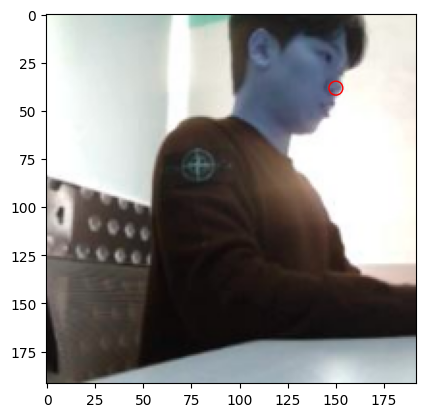

In [5]:
# test 
num = 1  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_studying[f"{point_check}Y"][num]*192,keypoint_studying[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

In [6]:
body_part = [ 'left_eye_', 'right_eye_','left_ear_','right_ear_',
       'left_shoulder_', 'right_shoulder_', 'left_elbow_', 'right_elbow_',
        'left_wrist_',  'right_wrist_','nose_']

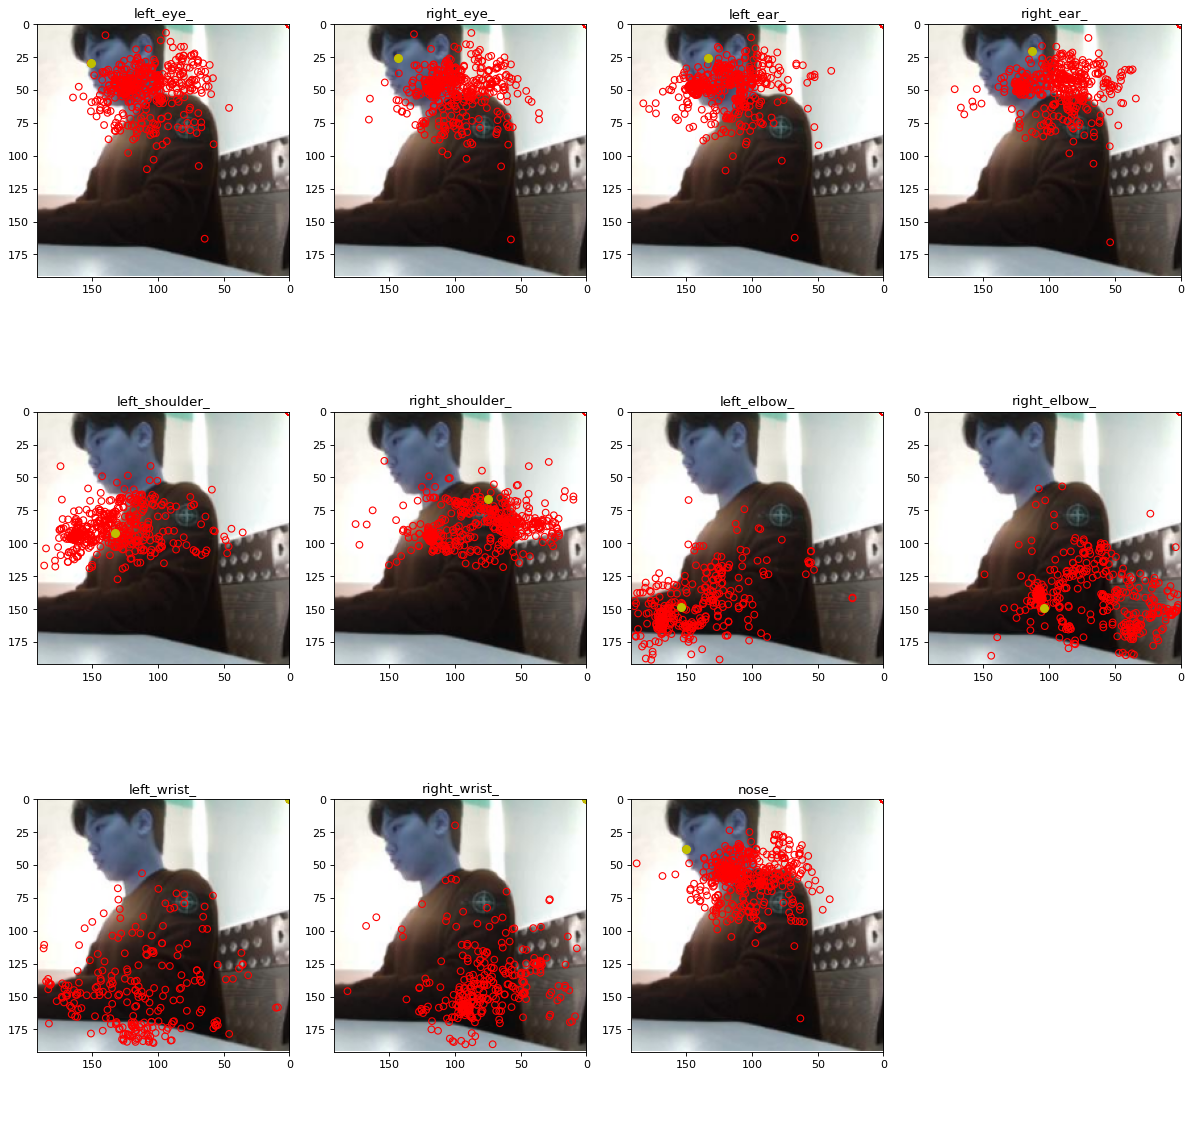

In [8]:
num = 1

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"]*192,keypoint_studying[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"][num]*192,keypoint_studying[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


*------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [9]:
""" 딴짓 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_playing = pd.read_csv("keypoint_playing.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_playing

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.108453,0.188118,0.079799,0.211656,0.072383,0.147514,0.111603,0.208735,0.100037,0.060476,0.299707,0.170413,0.247275,0.023572,0.576063,0.216647,0.000000,0.000000,0.805590,0.238872,0.000000,0.000000
1,0.677465,0.812987,0.645498,0.844939,0.621500,0.806434,0.000000,0.000000,0.562600,0.719110,0.000000,0.000000,0.651252,0.582602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.282280,0.490071,0.239302,0.474087,0.238296,0.455606,0.260932,0.317594,0.259570,0.287552,0.510386,0.411198,0.475888,0.224896,0.000000,0.000000,0.816845,0.534188,0.508502,0.700674,0.513584,0.660723
3,0.414086,0.485054,0.358678,0.504393,0.344163,0.507695,0.384923,0.623740,0.000000,0.000000,0.000000,0.000000,0.444492,0.710952,0.000000,0.000000,0.488091,0.594820,0.000000,0.000000,0.000000,0.000000
4,0.555809,0.311376,0.504040,0.344645,0.508362,0.270318,0.439907,0.397178,0.458303,0.214689,0.674768,0.455783,0.632354,0.123495,0.956702,0.538634,0.943189,0.048261,0.000000,0.000000,0.000000,0.000000
5,0.398963,0.462759,0.346344,0.491528,0.342272,0.482821,0.371923,0.659460,0.346188,0.645184,0.572330,0.720668,0.450482,0.670911,0.668859,0.343367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.381350,0.438464,0.343062,0.465184,0.334042,0.442571,0.350311,0.627582,0.321566,0.546375,0.534254,0.694673,0.447861,0.551523,0.672754,0.335816,0.000000,0.000000,0.453660,0.399197,0.448974,0.394546
7,0.424628,0.621610,0.388962,0.628748,0.378054,0.604707,0.348471,0.545367,0.329869,0.461760,0.528280,0.453277,0.465082,0.311518,0.669326,0.686709,0.671481,0.689840,0.416476,0.964304,0.516355,0.624235
8,0.327766,0.526288,0.279084,0.567211,0.274568,0.548733,0.312399,0.734685,0.302978,0.716824,0.608107,0.774758,0.483019,0.599098,0.958425,0.469428,0.000000,0.000000,0.644505,0.370213,0.601939,0.340125
9,0.525656,0.648517,0.485402,0.661337,0.473001,0.644004,0.427261,0.589073,0.408360,0.558819,0.534146,0.476982,0.452691,0.362794,0.701082,0.668714,0.686481,0.667348,0.000000,0.000000,0.561036,0.682410


In [10]:
np.sum(keypoint_playing.isnull())

nose_X              0
nose_Y              0
left_eye_X          0
left_eye_Y          0
right_eye_X         0
right_eye_Y         0
left_ear_X          0
left_ear_Y          0
right_ear_X         0
right_ear_Y         0
left_shoulder_X     0
left_shoulder_Y     0
right_shoulder_X    0
right_shoulder_Y    0
left_elbow_X        0
left_elbow_Y        0
right_elbow_X       0
right_elbow_Y       0
left_wrist_X        0
left_wrist_Y        0
right_wrist_X       0
right_wrist_Y       0
dtype: int64

In [11]:
keypoint_playing.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.298307,0.345647,0.246587,0.345302,0.252193,0.321583,0.221832,0.355807,0.194189,0.237242,0.335056,0.391142,0.335152,0.256481,0.210639,0.157883,0.260784,0.116135,0.132937,0.109824,0.202339,0.122038
std,0.231561,0.270906,0.206988,0.283494,0.209032,0.264127,0.192963,0.301839,0.208613,0.261011,0.286375,0.343076,0.277941,0.260296,0.373240,0.293850,0.384404,0.216029,0.279508,0.245156,0.323623,0.208517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.359550,0.383923,0.283385,0.391938,0.282463,0.364009,0.268701,0.426483,0.194498,0.177532,0.451724,0.474025,0.455740,0.190663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.445322,0.547454,0.379692,0.581333,0.388057,0.503031,0.360406,0.628764,0.348594,0.447263,0.588622,0.678904,0.571586,0.524613,0.000000,0.000000,0.760876,0.140300,0.000000,0.000000,0.557579,0.282189
max,0.833870,0.974247,0.879377,1.005827,0.769591,0.941662,0.697135,0.948535,0.757844,0.922661,0.781789,0.990339,0.790472,0.907441,0.988320,0.985762,0.977955,0.975751,0.968225,0.968574,0.977589,0.952260


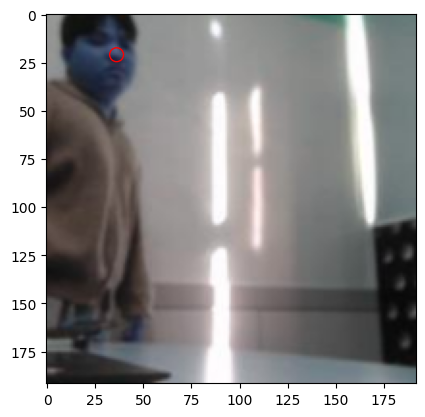

In [12]:
# test 
num = 0  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_playing[f"{point_check}Y"][num]*192,keypoint_playing[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

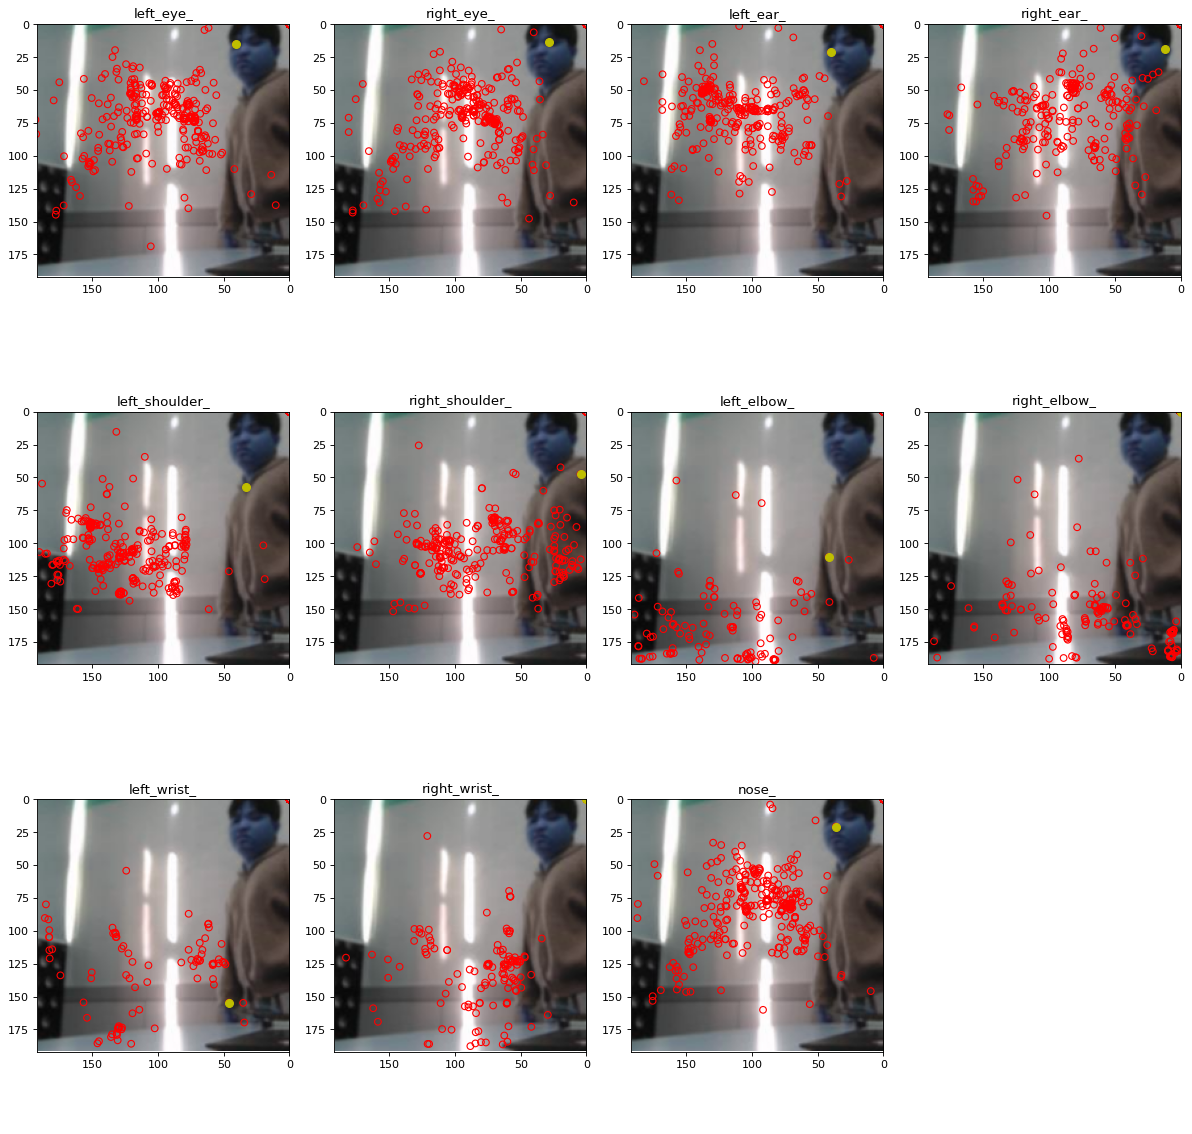

In [13]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"]*192,keypoint_playing[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"][num]*192,keypoint_playing[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


# 모델 만들기

In [14]:
"""공부,딴짓 포인트들을 keypoint 데이터 프레임으로 합쳐줌"""
keypoint_playing["label"] = 0  # 딴짓 중 lable = 0
keypoint_studying["label"] = 1 # 공부 중 lable = 1
keypoint = pd.concat([keypoint_playing,keypoint_studying],axis=0)
keypoint = keypoint.sample(frac=1).reset_index(drop=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
X = keypoint.iloc[:,:-1]
y = keypoint.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [17]:
model = SVC(kernel="rbf").fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

In [18]:
print('Score:', np.around(score,4))

Score: 0.832


In [19]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 88  24]
 [ 17 115]]


In [25]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.8273381294964028
Recall: 0.8712121212121212
F1 Score: 0.8487084870848707


In [26]:
"""모델 저장"""
from joblib import dump
dump(model, '/capstone/model.joblib')

['/capstone/model.joblib']

# 실전 테스트

In [23]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import warnings

warnings.filterwarnings("ignore")

interpreter = tf.lite.Interpreter(model_path="lite-model_movenet_singlepose_lightning_3.tflite")
interpreter.allocate_tensors()

In [24]:
cap = cv2.VideoCapture(0)
interval = 0

while cap.isOpened():
    data = []
    ret, frame = cap.read()
    if interval % 100 == 0:
        
        # Reshape image
        img = frame.copy()
        img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
        input_image = tf.cast(img, dtype=tf.float32)

        # Setup input and output 
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Make predictions 
        interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
        interpreter.invoke()
        keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

            
        point_cnt = 0  # 관절수 카운트
        for keypoints_with_score in keypoints_with_scores[0][0][:11]:
            for ax in range(2):
                data.append(keypoints_with_score[:2][ax])
                if (keypoints_with_score[2]> 0.1):# 0.1 이하는 point 감지 못 한 것으로 간주
                    point_cnt += 1
            
        # 모델 테스트
        data = np.array(data)
        state = model.predict(data.reshape(1, -1))
        print(point_cnt)
        if point_cnt >= 16 :   #  2개(x,y좌표) * 3(최소 3관절 이상) * 2(오른쪽,왼쪽)
            if state == 1 : 
                print("공부 중")
            elif state == 0 : 
                print("딴짓 중")
        else : print("딴짓 중 _ 관절수 부족")
            
        interval = 0         
    interval += 1 

    
    cv2.imshow('Pose Detecting', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

18
공부 중
18
공부 중
18
공부 중
18
공부 중
16
공부 중
16
공부 중
22
공부 중
22
공부 중
22
공부 중
18
공부 중
18
공부 중
16
공부 중
20
공부 중
20
공부 중
20
공부 중
20
공부 중
20
공부 중
20
공부 중
20
공부 중
18
딴짓 중
14
딴짓 중 _ 관절수 부족
20
딴짓 중
20
딴짓 중
20
공부 중
22
공부 중
22
공부 중
18
딴짓 중
18
딴짓 중
20
딴짓 중
22
딴짓 중
16
공부 중
18
공부 중
20
공부 중
18
공부 중
18
공부 중
20
공부 중
20
공부 중
20
공부 중
20
공부 중
16
공부 중
20
공부 중
18
공부 중
20
공부 중
20
공부 중
20
공부 중
20
공부 중
18
공부 중
18
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
20
공부 중
18
공부 중
20
공부 중
22
공부 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
공부 중
22
공부 중
18
공부 중
20
공부 중
22
딴짓 중
16
딴짓 중
14
딴짓 중 _ 관절수 부족
16
공부 중
18
공부 중
14
딴짓 중 _ 관절수 부족
14
딴짓 중 _ 관절수 부족
20
공부 중
16
공부 중
20
공부 중
18
공부 중
6
딴짓 중 _ 관절수 부족
8
딴짓 중 _ 관절수 부족
12
딴짓 중 _ 관절수 부족
8
딴짓 중 _ 관절수 부족
22
딴짓 중
14
딴짓 중 _ 관절수 부족
6
딴짓 중 _ 관절수 부족
0
딴짓 중 _ 관절수 부족
20
딴짓 중
12
딴짓 중 _ 관절수 부족
20
공부 중
20
공부 중
18
공부 중
20
공부 중
20
공부 중
20
공부 중
18
딴짓 중
18
딴짓 중
18
딴짓 중
20
딴짓 중
22
공부 중
22
공부 중
22
공부 중
20
공부 중
20
공부 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
딴짓 중
22
공부 중
22
공부 중
20
딴짓 중
22
딴짓 중
2

In [26]:
"""딴짓 중 모델 더 가져오기(핸드폰 하는 것 위주)  + 쓰레쉬홀드값 높이기  """

'딴짓 중 모델 더 가져오기(핸드폰 하는 것 위주)  + 쓰레쉬홀드값 높이기  '